In [1]:
import xml.etree.ElementTree as sT
import matplotlib.pyplot as plt
import networkx as nx
import os, sys

cwd = os.getcwd()
frameworkDir = os.path.abspath(os.path.join(cwd, os.pardir, '../src'))
sys.path.append(frameworkDir)

from dackar.utils.mbse.LMLparser import LMLobject

Warming up PyWSD (takes ~10 secs)... took 2.100884199142456 secs.


In [2]:
test = LMLobject('test_LML.xml')
test.LMLparser('test_analytical')

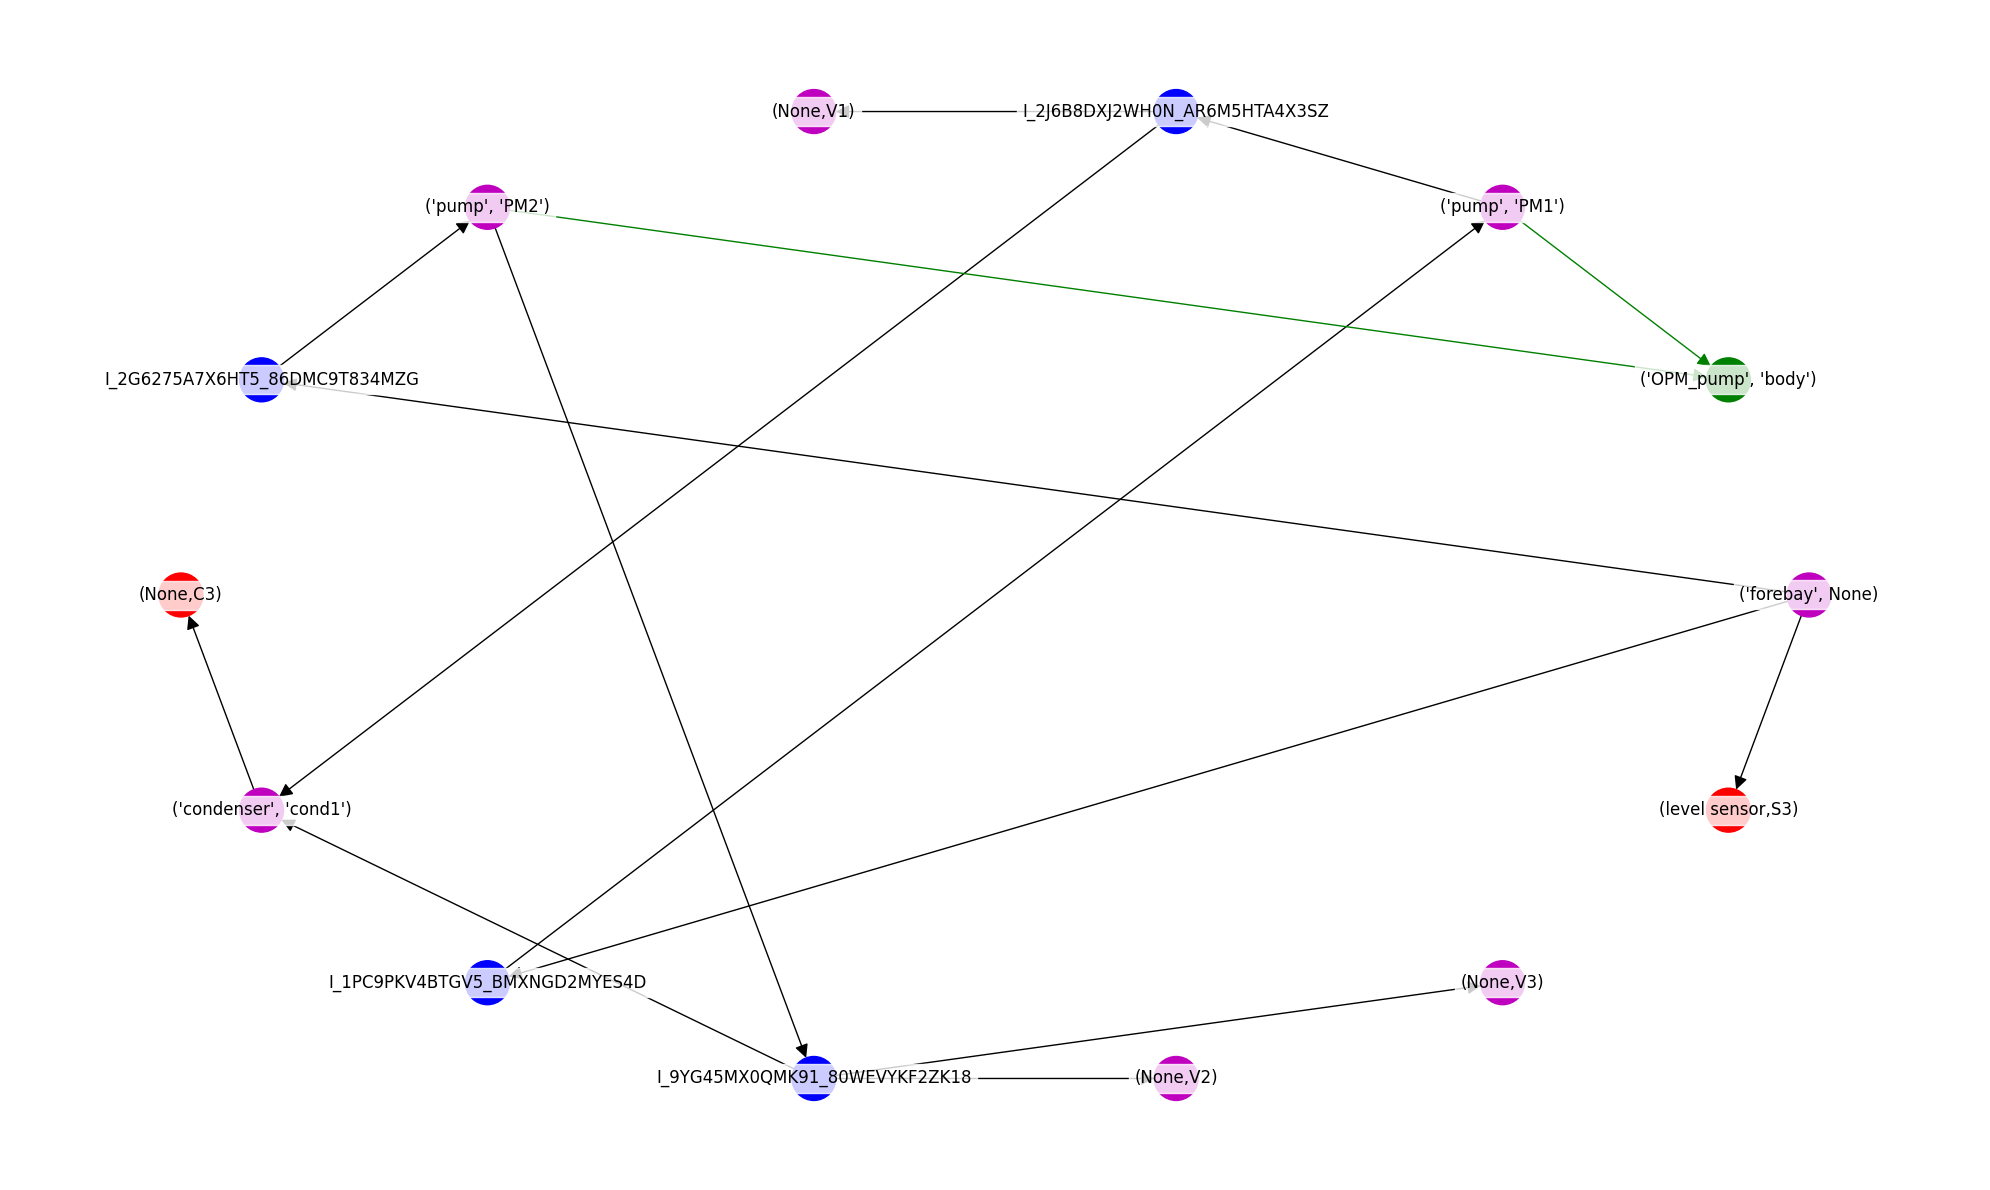

In [3]:
testGraph = test.returnGraph()

edge_colors = nx.get_edge_attributes(testGraph,'color').values()
node_colors = nx.get_node_attributes(testGraph,'color').values()

label_options = {"ec": "white", "fc": "white", "alpha": 0.8}
fig, ax = plt.subplots(figsize=(20, 12))
nx.draw_shell(testGraph, node_color=node_colors, edge_color=edge_colors, with_labels=True, bbox=label_options, arrowsize=20, node_size=1000)
plt.gca()
fig.tight_layout()
plt.axis("off")
plt.show()

In [4]:
ent, sub = test.returnEntities()
ent

{'I_1ANY76DXGGJHF_9DGRFMPMJ53R3': ('condenser', 'cond1'),
 'I_3VKFEY727MKCY_8Y457TV9VW3Y1': ('forebay', None),
 'I_2970C68C78KHH_BKEXT5HRKBFAC': ('pump', 'PM1'),
 'I_654C7PJE4CGFQ_A4R58Z120VYQH': ('pump', 'PM2')}

In [5]:
test.returnListIDs()

['PM2',
 '(None,C3)',
 '(None,V3)',
 'PM1',
 '(None,V2)',
 '(level sensor,S3)',
 'cond1',
 '(None,V1)']

In [6]:
test.printOnFile('test')

In [7]:
graph1 = test.dumpDGSgraph('test1')

{0: '(None,C3)', 1: ('condenser', 'cond1'), 2: 'I_1PC9PKV4BTGV5_BMXNGD2MYES4D', 3: 'I_9YG45MX0QMK91_80WEVYKF2ZK18', 4: '(None,V2)', 5: '(None,V3)', 6: '(level sensor,S3)', 7: ('forebay', None), 8: ('OPM_pump', 'body'), 9: ('pump', 'PM1'), 10: 'I_2J6B8DXJ2WH0N_AR6M5HTA4X3SZ', 11: '(None,V1)', 12: ('pump', 'PM2'), 13: 'I_2G6275A7X6HT5_86DMC9T834MZG'}


AttributeError: module 'graphdatascience.graph' has no attribute 'construct'

In [ ]:
import pandas as pd
import graphdatascience as gds

nodes = pd.DataFrame(
    {
        "nodeId": [0, 1, 2, 3],
        "labels":  ["A", "B", "C", "A"],
        "prop1": [42, 1337, 8, 0],
        "otherProperty": [0.1, 0.2, 0.3, 0.4]
    }
)

relationships = pd.DataFrame(
    {
        "sourceNodeId": [0, 1, 2, 3],
        "targetNodeId": [1, 2, 3, 0],
        "relationshipType": ["REL", "REL", "REL", "REL"],
        "weight": [0.0, 0.0, 0.1, 42.0]
    }
)

G = gds.graph.construct(
    "my-graph",      # Graph name
    nodes,           # One or more dataframes containing node data
    relationships    # One or more dataframes containing relationship data
)

assert "REL" in G.relationship_types()
